# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



## 1. Откроем файл и изучим его

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings


warnings.filterwarnings("ignore") 

try:
    print('Загружаем локально...')
    data = pd.read_csv('datasets/games.csv')
except:
    print('Локально не нашли, загружаем с сервера...')
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
print('Done')

Загружаем локально...
Локально не нашли, загружаем с сервера...
Done


In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Вывод. В датафрейме много пустых згачений, с этим что то надо будет сделать, также названия колонок с заглавной буквы, что не совсем корректно. Нужно переделвть типы данных нескольких столбцов.

## 2. Подготовка данных


- Замените названия столбцов (приведите к нижнему регистру)

In [ ]:
data.columns = data.columns.str.lower()


- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

удалим строки где имя или год нееизвестны, так как это нужный параметр для дальнейшего анализа, и оставлять его пустым бессмыслено

In [ ]:
data = data.dropna(subset=['year_of_release']) 
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer', errors='coerce')


- Обработайте пропуски при необходимости:

Посмотрим в каких столбцах они есть и моного ли:

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [ ]:
data = data.dropna(subset=['name']) 
data['rating'] = data['rating'].fillna('RP')

Удалили все незаполненные именем строчки, также для красоты, если рейтинг nan  то написали по русски что рейтинг не присвоем (RP)

Незаполненные ячейки могли появиться, потому что некоторые игры старые и тогда еще были не эта база данных, могли быть ошибки переноса из другой базы данных, ошибки заполнения данных оператором и т.д. Отсутствие рейтингов также можно обьяснить тем, что, возможно, этой игре просто не поставили рейтинг

- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Это означает, что рейтинг еще не определен, было скорее всего мало времени или недостаточно данных, чтобы его определить.
Пусть так и остаеться неопределен

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast='integer', errors='coerce')

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
Создадим для этого столбец 'all_sales'

In [ ]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

## 3. Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

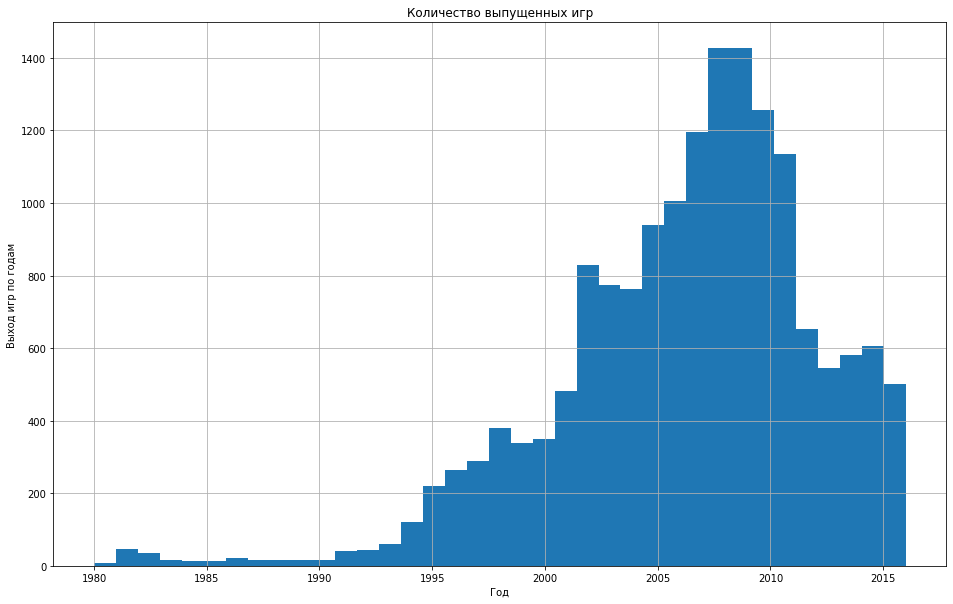

In [ ]:
plt.xlabel('Год')
plt.ylabel('Выход игр по годам')
plt.title('Количество выпущенных игр')
data['year_of_release'].hist(bins = 1+ int(data['year_of_release'].max() - data['year_of_release'].min())
                             ,figsize=(16, 10)
                            );

Данные за все периоды не важны. можно взять последние несколько лет. Нужно понять за какой период брать данные.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 


Сначала посмотрим на общую картину

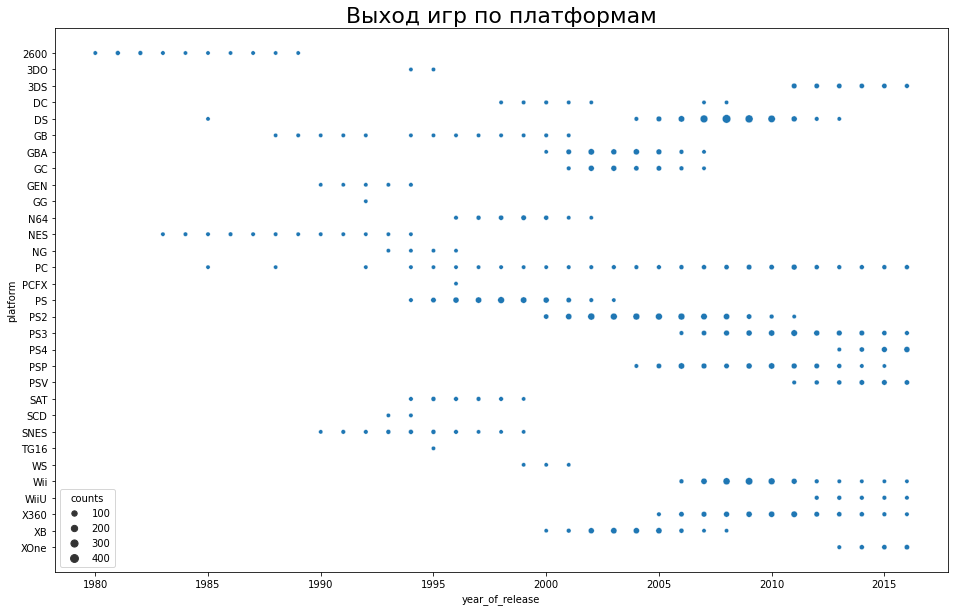

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
data_counts = data.groupby(['platform', 'year_of_release']).size().reset_index(name='counts')


fig, ax = plt.subplots(figsize=(16,10))    
sns.scatterplot(data_counts.year_of_release, data_counts.platform, size=data_counts.counts, ax=ax)

plt.title("Выход игр по платформам", fontsize=22);

Построим графики продаж крупнейших платформ

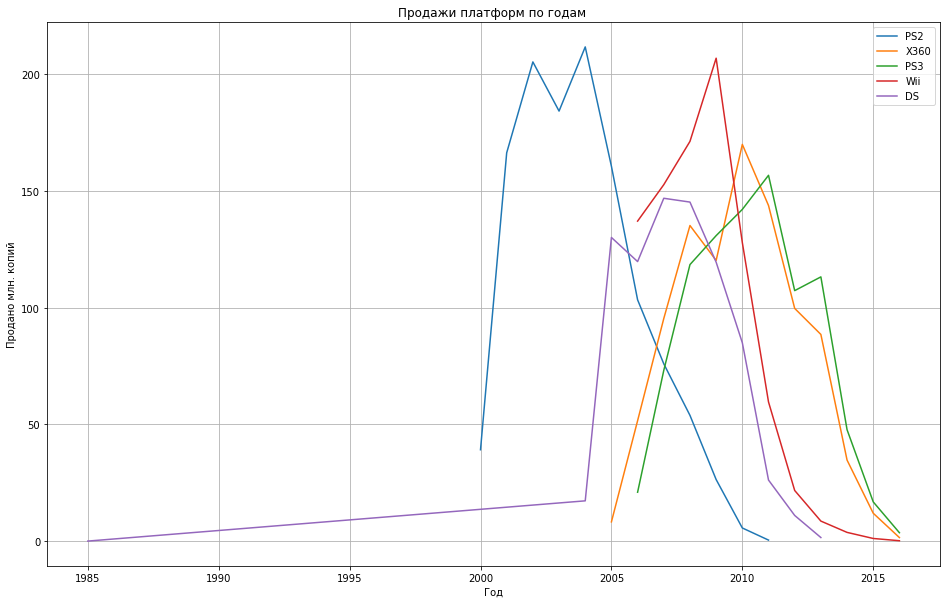

In [ ]:
top_platform = data.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').sort_values('all_sales',ascending=False).head(5)

# Построим график 
for i in top_platform.index:
    data.query('platform ==@i').groupby('year_of_release')['all_sales'].agg('sum').plot(
                                                                                        title='Продажи платформ по годам ',
                                                                                        xlabel='Год',
                                                                                        ylabel='Продано млн. копий',
                                                                                        kind  = 'line',
                                                                                        grid = True,
                                                                                        sharex = True,
                                                                                        sharey = True,
                                                                                        legend=True,
                                                                                        figsize=(16, 10));
plt.legend(top_platform.index);

In [ ]:
print(top_platform)

          all_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.78


Как видно среднее время "жизни" платформы примерно 8 лет. Так как данные за 2016 год неполные то только две  платформы (PS4 и XOne) переживает сейчас бум. Все остальные снижают продажи.

Покрупнее посмотрим последние годы с 2014 по 2016 тоесть за половину жизни платфоры

In [ ]:
# создадим сводную таблицу по годам позднее 2014 г
# да название data_11 но зато в коде больше ничего не надо менять
data_11 = data.query('year_of_release > 2013')

top2011_platform = data_11.pivot_table(
    index=['platform'], values='all_sales', aggfunc='sum').sort_values('all_sales',ascending=False)


Вывод. В последующем анализе данных и построении прогноза на 2017 год, можно использовать данные с 2011 года. Остальные данные можно отбросить.

### Возьмем данные за соответствующий актуальный период. 


<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
👍

### Посмотрим как меняються продажи игр по регионам

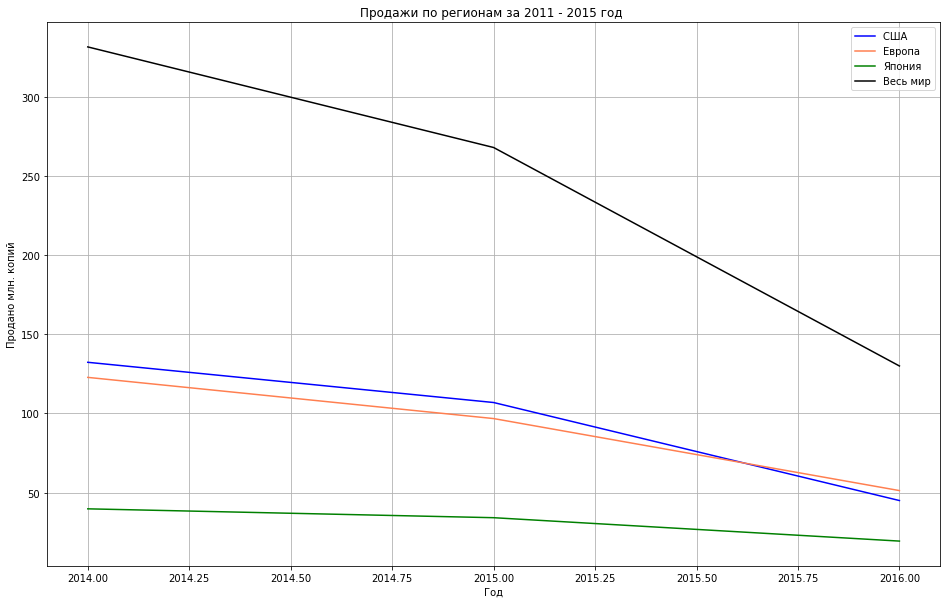

In [ ]:
data_11.groupby('year_of_release')['na_sales'].agg('sum').plot(
                    title='Продажи по регионам за 2011 - 2015 год ',
                    xlabel='Год',
                    ylabel='Продано млн. копий',
                    kind  = 'line',
                    grid = True,
                    color='blue',
                    legend=True,
                    figsize=(16, 10)
                    )
data_11.groupby('year_of_release')['eu_sales'].agg('sum').plot(
                    #title='Продажи платформ по годам ',
                    xlabel='Год',
                    ylabel='Продано млн. копий',
                    kind  = 'line',
                    grid = True,
                    color='coral',
                    legend=True,
                    figsize=(16, 10)
                    )
data_11.groupby('year_of_release')['jp_sales'].agg('sum').plot(
                    #title='Продажи платформ по годам ',
                    xlabel='Год',
                    ylabel='Продано млн. копий',
                    kind  = 'line',
                    grid = True,
                    color='green',
                    legend=True,
                    figsize=(16, 10)
                    )
data_11.groupby('year_of_release')['all_sales'].agg('sum').plot(
                    #title='Продажи платформ по годам ',
                    xlabel='Год',
                    ylabel='Продано млн. копий',
                    kind  = 'line',
                    grid = True,
                    color='black',
                    legend=True,
                    figsize=(16, 10)
                    )
plt.legend(["США ","Европа","Япония","Весь мир"]);

Вывод. Продажи игр падают во всех регионах, надо что то делать.

### Определим какие платформы лидируют по продажам, растут или падают? 
 
Вот список  самых продающихся платформ

In [ ]:
print(top2011_platform)

          all_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22
WiiU          42.98
PC            27.05
PSV           22.40
Wii            5.07
PSP            0.36


Построим график продаж по платформам за актуальный период

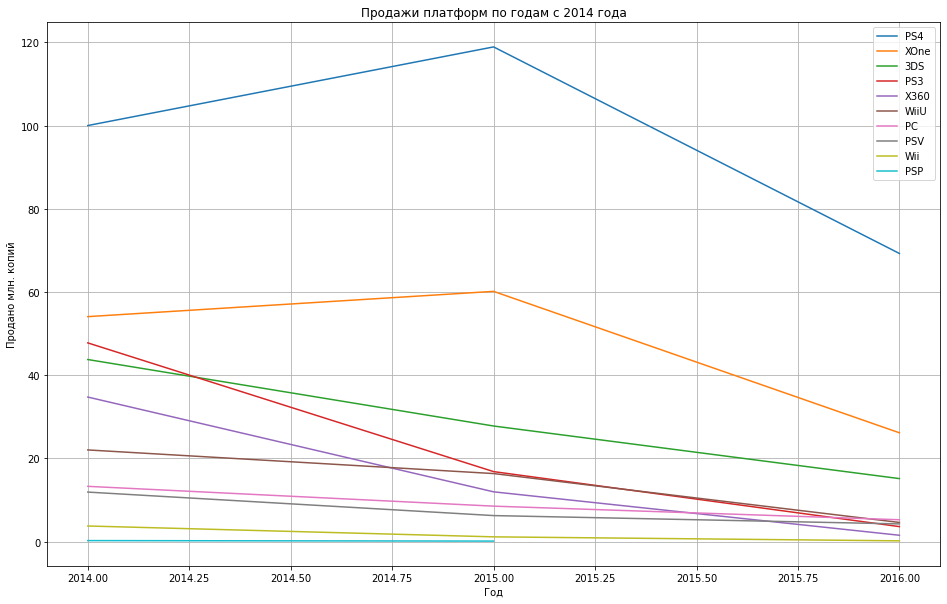

In [ ]:
for i in top2011_platform.index:
    data_11.query('platform ==@i').groupby('year_of_release')['all_sales'].agg('sum').plot(
                                                        kind  = 'line',
                                                        xlabel='Год',
                                                        ylabel='Продано млн. копий',
                                                        grid = True,
                                                        legend=True,
                                                        title='Продажи платформ по годам с 2014 года',
                                                        figsize=(16, 10)
                                                        )
plt.legend(top2011_platform.index);

Вывод. Cейчас на подьеме платформы PS4 и XOne. Именно по ним можно построить прогноз на 2017 год

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 


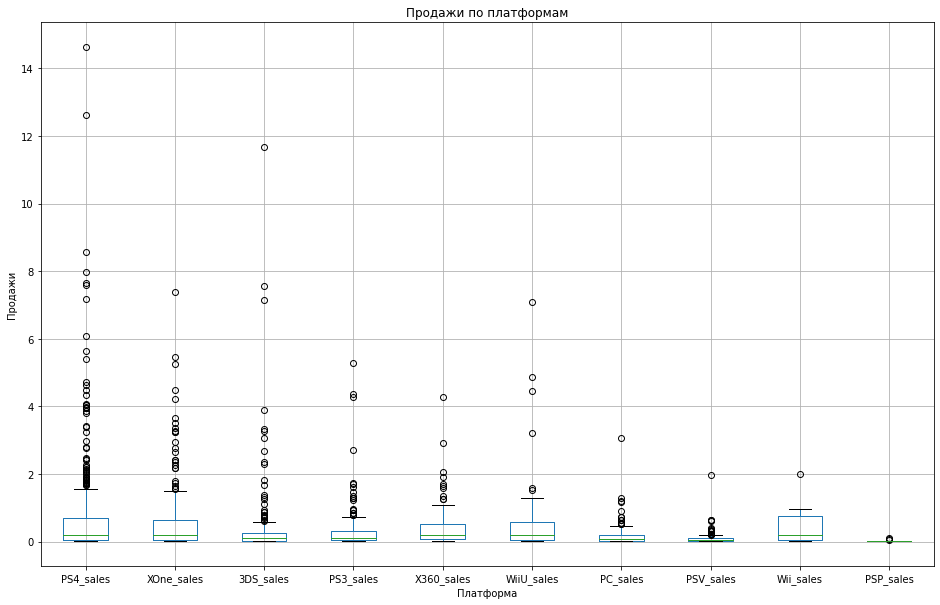

In [ ]:
# надо сделать в датасете колонки с продажами по платформам
col_platform_sales = []
for i in top2011_platform.index:
    data_11[i+'_sales'] = data_11.query('platform ==@i')['all_sales']
    col_platform_sales.append(i+'_sales')
    
plt.figure(figsize=(16, 10))
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
data_11.boxplot(column=col_platform_sales);

    

Посмотрим покрупнее:

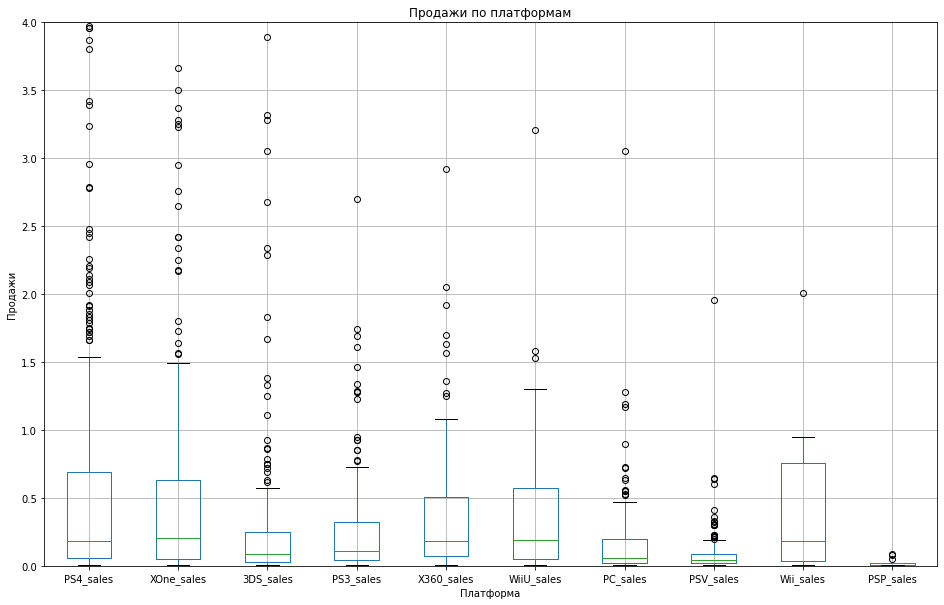

In [ ]:
plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
data_11.boxplot(column=col_platform_sales);

Вывод.  Видно , что большинство продаж лежит в диапазоне до 2 млн. Есть большие выбросы, это и не удивительно, ведь на прошлых этапам мы поняли что у каждой платформы есть "время жизни", когда наблюдаем большие продажи. Потом платформа теряет популярность, уступая ее другим платформам.

Нам важно, что сейчас на подьеме платформы PS4 и XOne

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Сначала посмотрим на ситуацию в целом

In [ ]:
def cheddock_scale(message):
    if message >0:
        pref = ' положительная '
    else:
        pref = ' отрицательная '
    correlation = abs(message)
    if correlation <= 0.1:
        return ' нет'
    elif correlation <= 0.3:
        return pref + 'слабая'
    elif correlation <= 0.5:
        return pref + 'умеренная'    
    elif correlation <= 0.7:
        return pref + 'заметная'    
    elif correlation <= 0.9:
        return pref + 'высокая'    
    else:
        return pref + 'весьма высокая'
print('Корреляция продаж с оценкой критиков',cheddock_scale(data_11['all_sales'].corr(data_11['critic_score'])))
print('Корреляция продаж с оценкой игроков',cheddock_scale(data_11['all_sales'].corr(data_11['user_score'])))

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  нет


Для примера разберем платформу PS4. Она достаточно популярна, и ее популярность не снижаеться до 2015 г включительно.

In [ ]:
analyzed_platform = "PS4"
print('По платформе',analyzed_platform)
print('Корреляция продаж с оценкой критиков',data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['critic_score']), end="")
print(cheddock_scale(data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['critic_score'])))

print('Корреляция продаж с оценкой игроков',data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['user_score']), end="")
print(cheddock_scale(data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['user_score'])))

По платформе PS4
Корреляция продаж с оценкой критиков 0.40266141068104083 положительная умеренная
Корреляция продаж с оценкой игроков -0.040131589472697356 нет


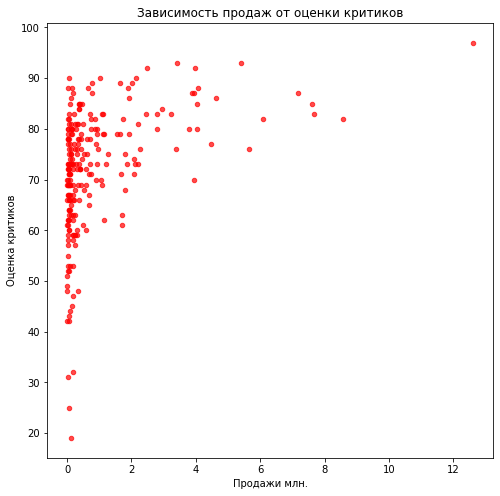

In [ ]:
data_11.query('platform == @analyzed_platform').plot(x='all_sales'
                 ,y='critic_score'
                 ,kind='scatter'
                 ,alpha=0.7
                 ,color='red'
                 ,figsize=(8, 8)
                 ,title='Зависимость продаж от оценки критиков'
                 ,xlabel='Продажи млн.'
                 ,ylabel='Оценка критиков'
                );

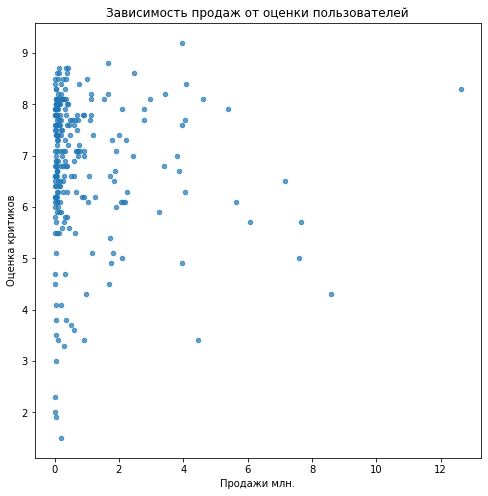

In [ ]:
data_11.query('platform == @analyzed_platform').plot(x='all_sales'
                 ,y='user_score'
                 ,kind='scatter'
                 ,alpha=0.7
                 ,figsize=(8, 8)
                 ,title='Зависимость продаж от оценки пользователей'
                 ,xlabel='Продажи млн.'
                 ,ylabel='Оценка критиков'
                );

Вывод. Как видно с оценкой критиков есть небольшая корреляция, связи продаж с оценками игроков практически нет.

### Соотнесем выводы с продажами игр на других платформах.

Построим графики в цикле по всем популярным платформам


Платформа PS4


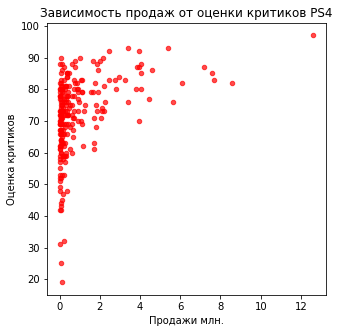

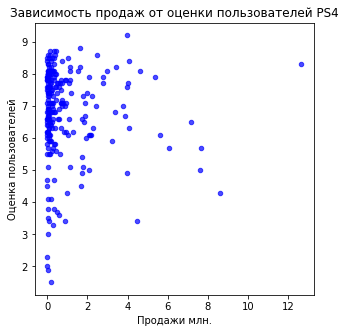

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  нет


Платформа XOne


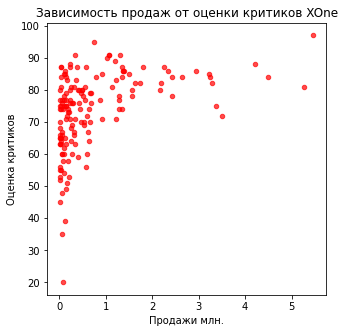

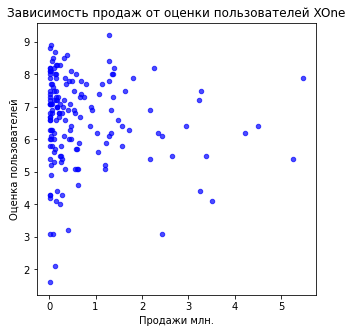

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  нет


Платформа 3DS


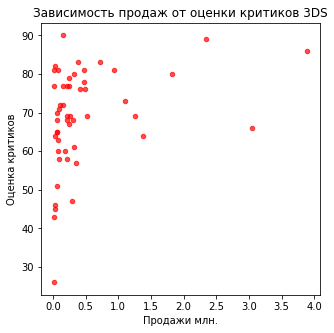

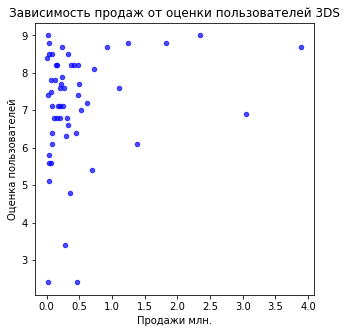

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  положительная слабая


Платформа PS3


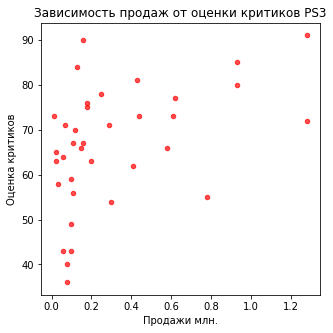

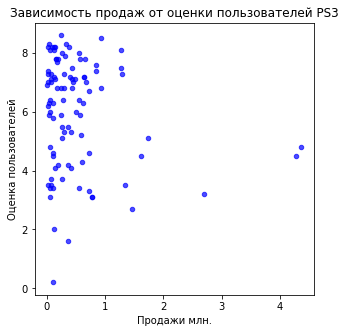

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  отрицательная слабая


Платформа X360


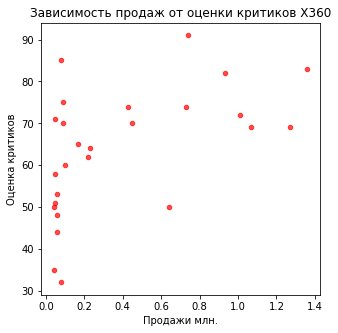

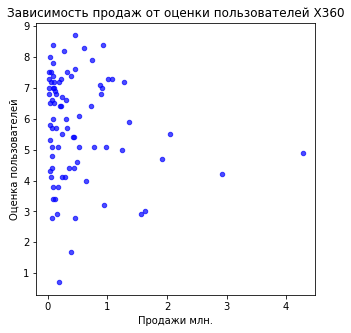

Корреляция продаж с оценкой критиков  положительная заметная
Корреляция продаж с оценкой игроков  отрицательная слабая


Платформа WiiU


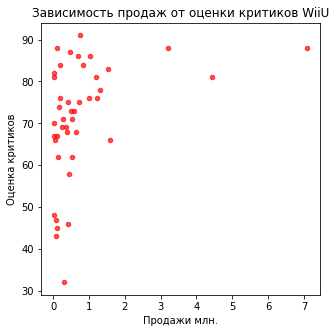

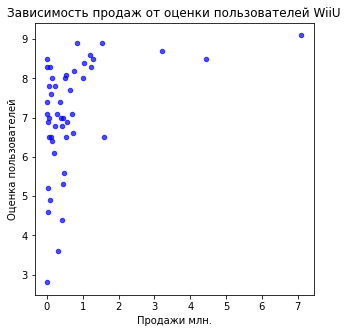

Корреляция продаж с оценкой критиков  положительная умеренная
Корреляция продаж с оценкой игроков  положительная умеренная


Платформа PC


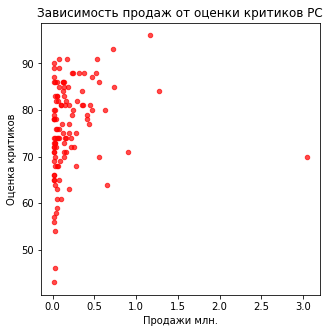

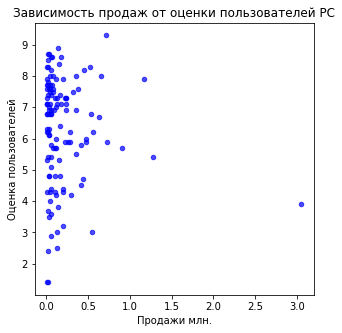

Корреляция продаж с оценкой критиков  положительная слабая
Корреляция продаж с оценкой игроков  нет


Платформа PSV


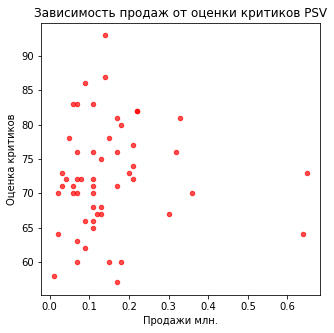

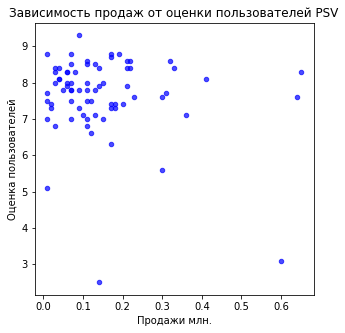

Корреляция продаж с оценкой критиков  нет
Корреляция продаж с оценкой игроков  отрицательная слабая


Платформа Wii


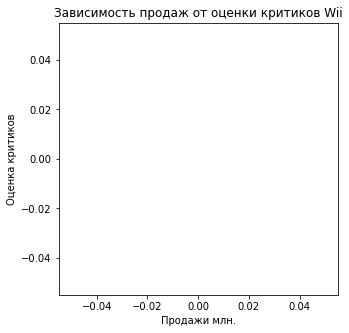

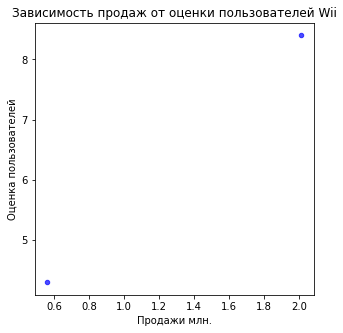

Корреляция продаж с оценкой критиков  отрицательная весьма высокая
Корреляция продаж с оценкой игроков  положительная весьма высокая


Платформа PSP


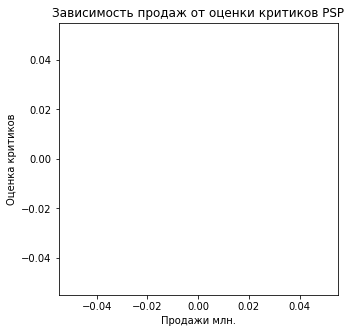

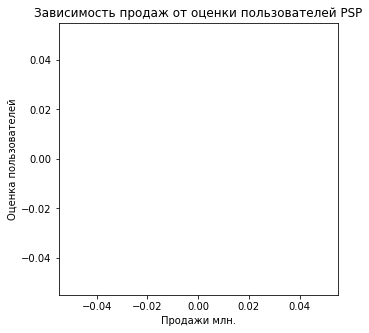

Корреляция продаж с оценкой критиков  отрицательная весьма высокая
Корреляция продаж с оценкой игроков  отрицательная весьма высокая




In [ ]:
   
for i in top2011_platform.index:
    analyzed_platform = i
    print('Платформа',analyzed_platform)
    data_11.query('platform == @analyzed_platform').plot(x='all_sales'
                 ,y='critic_score'
                 ,kind='scatter'
                 ,alpha=0.7
                 ,figsize=(5, 5)
                 ,color='red'
                 ,title='Зависимость продаж от оценки критиков '+analyzed_platform
                 ,xlabel='Продажи млн.'
                 ,ylabel='Оценка критиков'
                ) 
    data_11.query('platform == @analyzed_platform').plot(x='all_sales'
                 ,y='user_score'
                 ,kind='scatter'
                 ,alpha=0.7
                 ,figsize=(5, 5)
                 ,color='blue'
                 ,title='Зависимость продаж от оценки пользователей '+analyzed_platform
                 ,xlabel='Продажи млн.'
                 ,ylabel='Оценка пользователей'
                )     
    plt.show();
    print('Корреляция продаж с оценкой критиков',cheddock_scale(data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['critic_score'])))
    print('Корреляция продаж с оценкой игроков',cheddock_scale(data_11.query('platform == @analyzed_platform')['all_sales'].corr(data_11.query('platform == @analyzed_platform')['user_score'])))
    print()
    print()


Вывод. 
На платформе PS4 Корреляция продаж с оценкой критиков  положительная умеренная. Корреляция продаж с оценкой игроков нет
На платформе XOne Корреляция продаж с оценкой критиков  положительная умеренная. Корреляция продаж с оценкой игроков  нет
На платформе 3DS Корреляция продаж с оценкой критиков  положительная умеренная. Корреляция продаж с оценкой игроков  положительная слабая

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для начала, просто посмотрим на количество игр по жанрам

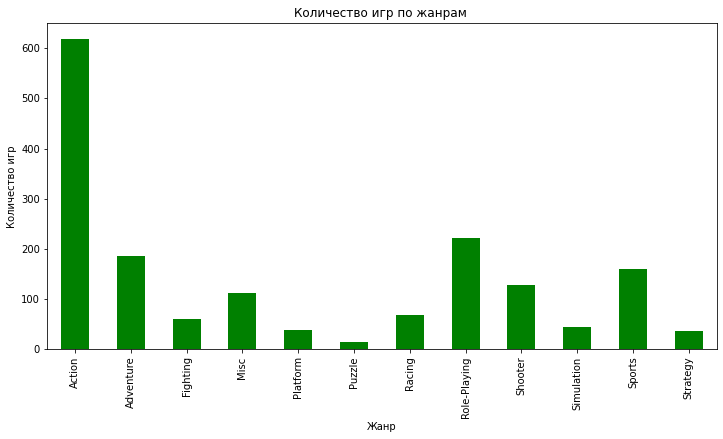

In [ ]:
data_11.groupby('genre')['all_sales'].agg('count').plot(
                                                     title='Количество игр по жанрам ',
                                                     xlabel='Жанр',
                                                     ylabel='Количество игр',
                                                     kind  = 'bar',
                                                     color='green',
                                                     grid = False,
                                                     figsize=(12, 6));

теперь посмотрим на продажи по жанрам

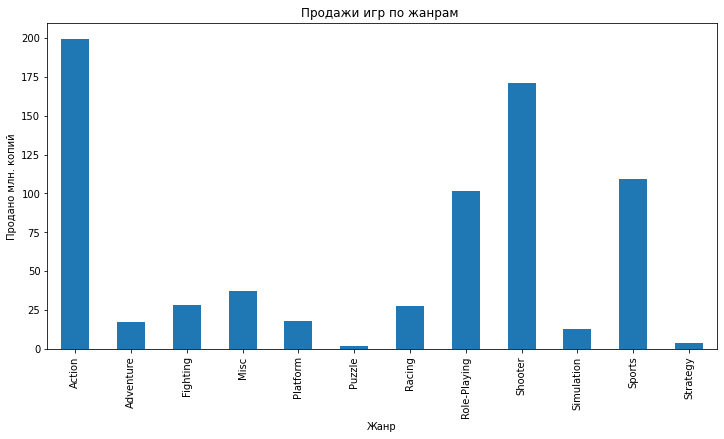

In [ ]:
data_11.groupby('genre')['all_sales'].agg('sum').plot(
                                                     title='Продажи игр по жанрам ',
                                                     xlabel='Жанр',
                                                     ylabel='Продано млн. копий',
                                                     kind  = 'bar',
                                                     grid = False,
                                                     figsize=(12, 6));

Чтобы найти жанр, где игры стабильно приносят высокий доход посмотрим на медианные продажи по жанрам

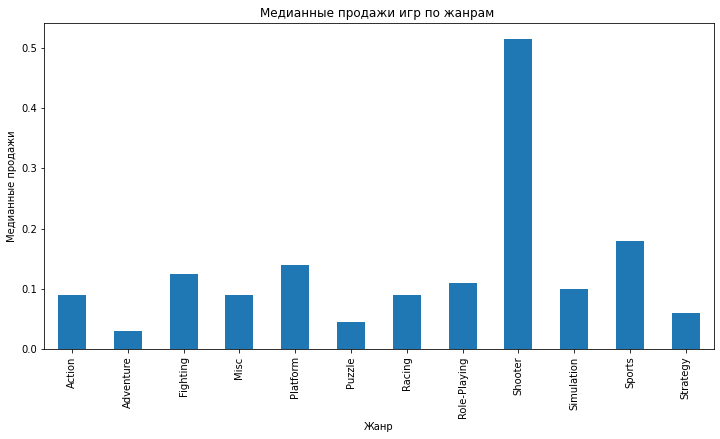

In [ ]:
data_11.groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Медианные продажи игр по жанрам ',
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     grid = False,
                                                     figsize=(12, 6));

А как выглядят продажи по жанрам на трех популярных платформах:

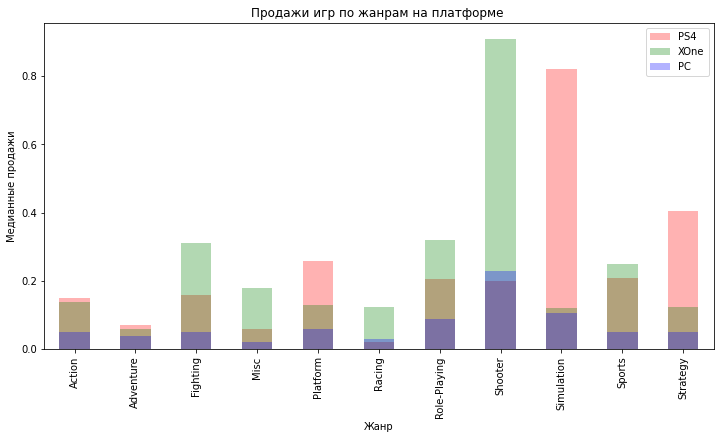

In [ ]:
analyzed_platform = "PS4"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ',
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     color='red',
                                                     alpha=0.3, 
                                                     figsize=(12, 6))


analyzed_platform = "XOne"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ',
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     color='green',
                                                     alpha=0.3, 
                                                     figsize=(12, 6))

analyzed_platform = "PC"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ',
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     color='blue',
                                                     alpha=0.3, 
                                                     figsize=(12, 6))
plt.legend(["PS4","XOne","PC"]);

Посмотрим отдельно по платформам:

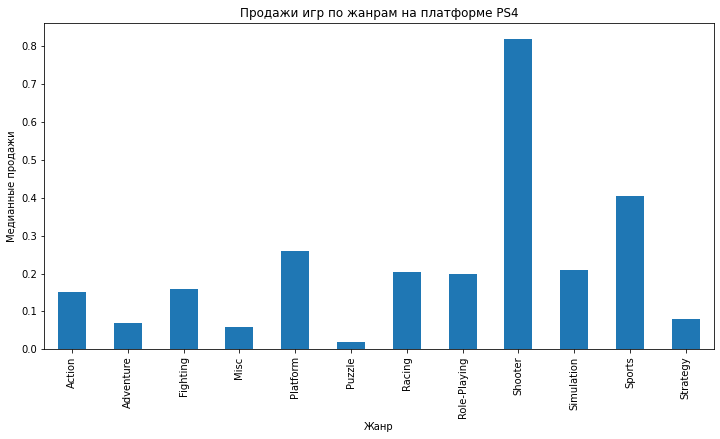

In [ ]:
analyzed_platform = "PS4"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ' + analyzed_platform,
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     grid = False,
                                                     figsize=(12, 6));

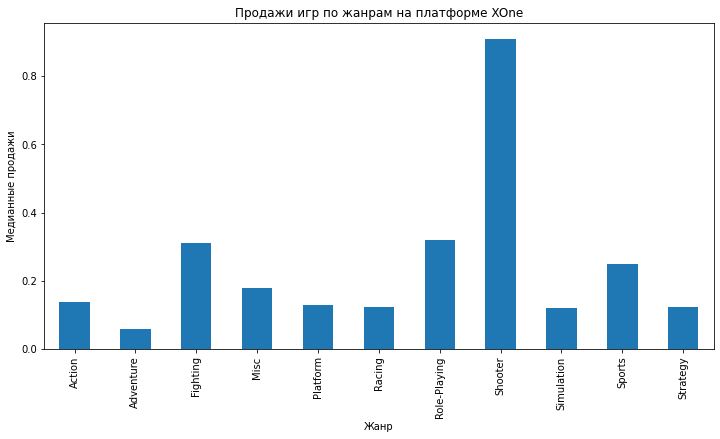

In [ ]:
analyzed_platform = "XOne"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ' + analyzed_platform,
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     grid = False,
                                                     figsize=(12, 6));

Персональный компьютеры, это уникальная платформа, она никогда не лидировала по продажам, но всегда актуальна, у нее нет как таковых взлетов и падений, поэтому , ради интереса посмотрим и на нее.

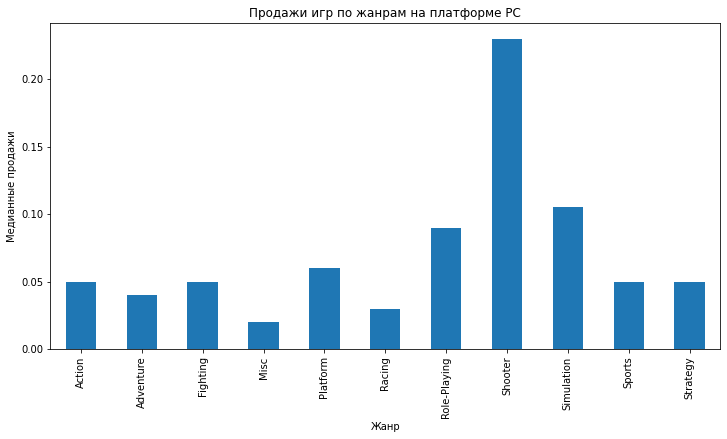

In [ ]:
analyzed_platform = "PC"
data_11.query('platform == @analyzed_platform').groupby('genre')['all_sales'].agg('median').plot(
                                                     title='Продажи игр по жанрам на платформе ' + analyzed_platform,
                                                     xlabel='Жанр',
                                                     ylabel='Медианные продажи',
                                                     kind  = 'bar',
                                                     grid = False,
                                                     figsize=(12, 6));

Вывод. Самый продаваймый жанр игр это Shooter, также популярны Sports и Platform        . 

На самой популярной на сегодня платформе PS4 это так же Shooter, Sports и Platform  

На второй "взлетающей" сейчас платформе XOne, популярны Shooter, Role-Playing,  Fighting

На персональных компьютерах популярны жанры Shooter, Simulation, Role-Playing 

Самыми непопулярными являються жанры Adventure, Strategy, Puzzle, Racing.  Причем эти игры непопулярны и их выпускаеться меньше всего. 

## 4. Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):


### Самые популярные платформы (топ-5). 

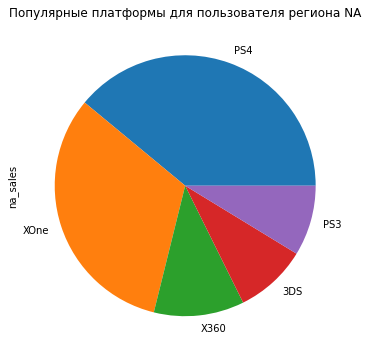

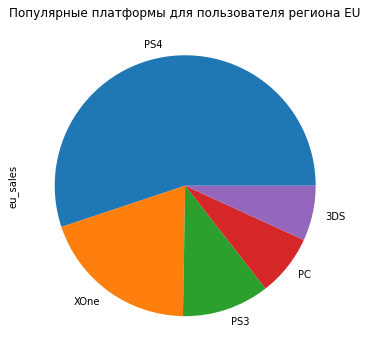

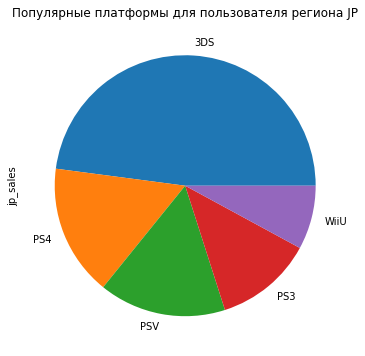

In [ ]:
data_11.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные платформы для пользователя региона NA',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();
data_11.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные платформы для пользователя региона EU',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();
data_11.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные платформы для пользователя региона JP',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();

Вывод. В Америке и европе безоговорочным лидером являеться платформа PS4, на втором месте XOne. В Японии другая ситуация: там лидером являеться платформа 3DS с почти половиной рынка, все остальные занимаю небольшой сегмент рынка.

### Самые популярные жанры (топ-5). 

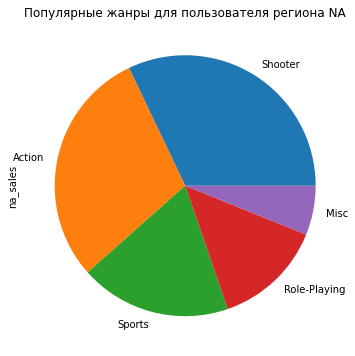

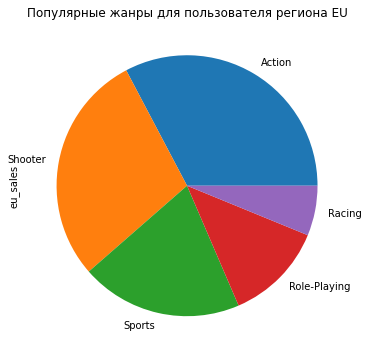

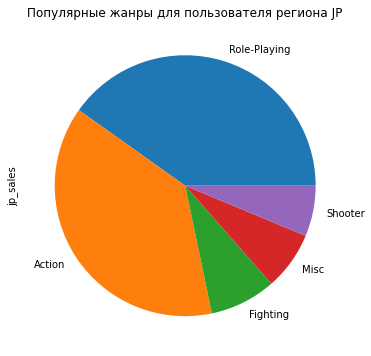

In [ ]:
data_11.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные жанры для пользователя региона NA',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();
data_11.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные жанры для пользователя региона EU',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();
data_11.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Популярные жанры для пользователя региона JP',
                                                     kind  = 'pie',
                                                     figsize=(12, 6))
plt.show();

Вывод.  Тут так же Америка и европа похожи: у них любимые жанры это шутеры и Action и  Sports. В Японии же больше любят жанры Role-playing, Action. Это надо учитывать выпуская игры в этих регионах в будущем.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

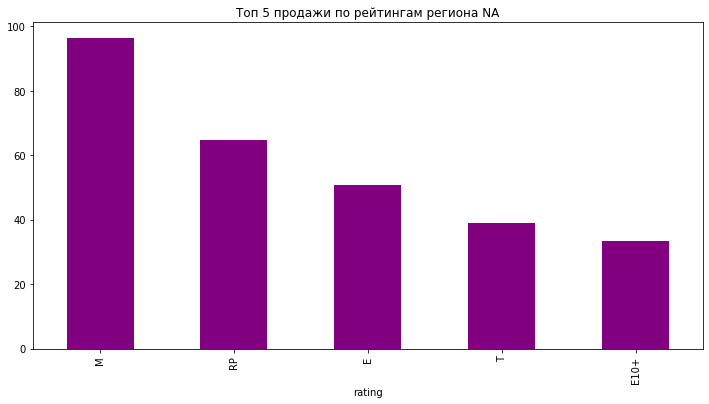

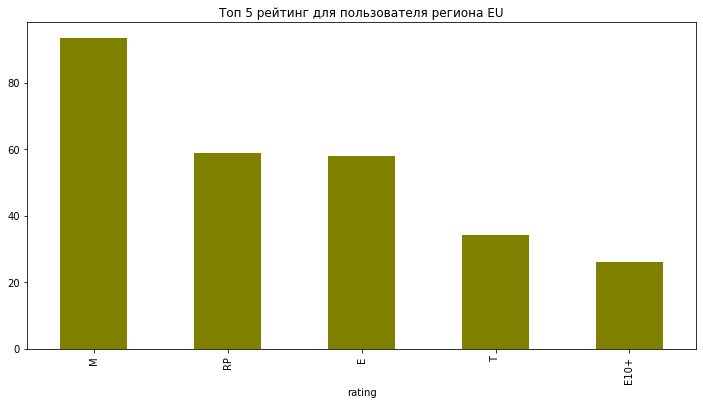

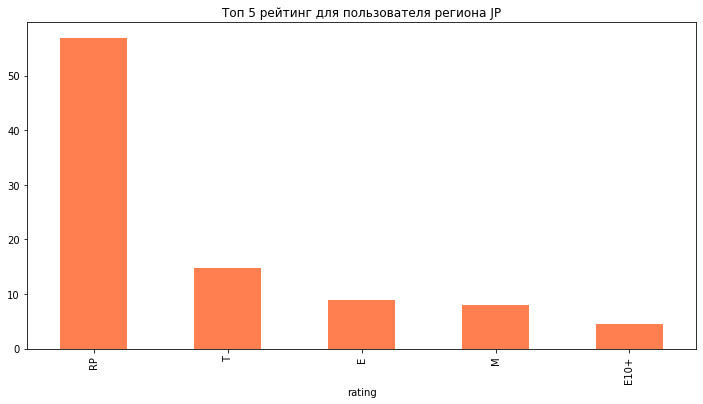

In [ ]:
data_11.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Топ 5 продажи по рейтингам региона NA',
                                                     kind  = 'bar',
                                                     color='purple',
                                                     figsize=(12, 6))

plt.show();
data_11.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Топ 5 рейтинг для пользователя региона EU',
                                                     color='olive',
                                                     kind  = 'bar',
                                                     figsize=(12, 6))

plt.show();
data_11.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False).head().plot(
                                                     title='Топ 5 рейтинг для пользователя региона JP',
                                                     color='coral',
                                                     kind  = 'bar',
                                                     figsize=(12, 6))
#plt.legend(["NA","EU","JP"])
plt.show();

Вывод. В США по продажам лидируют игры с рейтингом "Подходит для лиц старше 17 лет", также популярны игры с рейитнгом "Подходит для всех возрастных категорий".  В Европе ситуация похожа.
В Японии очень много продаж игр , у которых рейтинг еще не определен, это может говорить о том что там продаеться много самобытных игр, которые не попали в США, где устанавливают этот рейтинг ESRB. Также в Японии более популярны игры для младших возрастных категорий. 

Типичный геймер из региона Северная Америка: играет на платформах  PS4, XOne, X360. Самые популярные жанры игр Shooter, Action, , Sports, Role-Playing, Misc. Играет в игры для взрослой целевой аудитории.

Типичный геймер из региона Европа: играет на платформах PS4, XOne Самые популярные жанры игр  Action, Shooter, Sports, Role-Playing,  Играет в игры для взрослой целевой аудитории.

Типичный геймер из региона Япония: играет на платформах 3DS, PS4, PSV Самые популярные жанры игр Role-Playing, Action,  Fighting, Misc. Играет в игры для всех возрастов, тоесть где мало насилия.

##  5. Проверим гипотезы

### а. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвинем гипотезу что:

Нулевая гипотеза: Средний рейтинг игр "user_score" на платформе Xbox One  = Средний рейтинг игр на платформе PC

Альтернативная гипотеза: Средний рейтинг игр на платформе Xbox One ≠ Средний рейтинг игр на платформе PC

Коофицент уровня значимости возьмем alpha = 0.05


In [ ]:
#Создаем выборку оценок пользователей на платформе XOne
mean_user_score_XOne = data_11.loc[data_11['platform'] == 'XOne' , 'user_score'].dropna()
#Создаем выборку оценок пользователей на платформе PC
mean_user_score_PC = data_11.loc[data_11['platform'] == 'PC' , 'user_score'].dropna()

# alpha =  значение уровня значимости
alpha = .05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    mean_user_score_XOne, 
    mean_user_score_PC,
    equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Вывод. Не получилось отвергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги на платформах Xbox One и PC могут быть разными.

### b. Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: Средний пользовательский рейтинг игр "user_score_action" жанра Action = средний рейтинг жанра Sports 

Альтернативная гипотеза: Средний рейтинг игр "user_score_action" жанра Action ≠ средний рейтинг жанра Sports 

Коофицент уровня значимости возьмем alpha = 0.05

In [ ]:
#Создаем выборку
user_score_action = data_11.loc[data_11['genre'] == 'Action' , 'user_score'].dropna()
#Создаем выборку
user_score_sports = data_11.loc[data_11['genre'] == 'Sports' , 'user_score'].dropna()

# alpha = задайте значение уровня значимости
alpha = .05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод. Отвергаем нулевую гипотезу о том что, средние пользовательские рейтинги жанров Action и Sports равны, значит будет верна альтернативная гипотеза, что средний рейтинг игр жанра Action не равен среднему рейтингу жанра Sports

## 6. Общий вывод

В этом проекте я анализировал датафрейм: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и т.д. Сначала я его загрузил и изучил общую труктуру данных, нашел и , по возможности, исправил пропуски значений. Какие то пропуски исправить получилось, какие то не представляеться возможным исправить, некоторые данные не влияют на дальнейшее исследование.
Для удобства анализа, добавил некоторые столбцы в таблицу. Провел исследование данных. Как меняються продажи по регионам, игровым платформам,  жанрам игр. Определил влияют ли оценки критиков и пользователей на продажи. Оказалось, что влияют оценки критиков, но не очень значительно. Оценки пользователей почти не влияют, на разных платформах эта зависимость разная, но часто ее вообще нет. Наверно потому что пользователь ставит оценку, когда он уже купил игру.

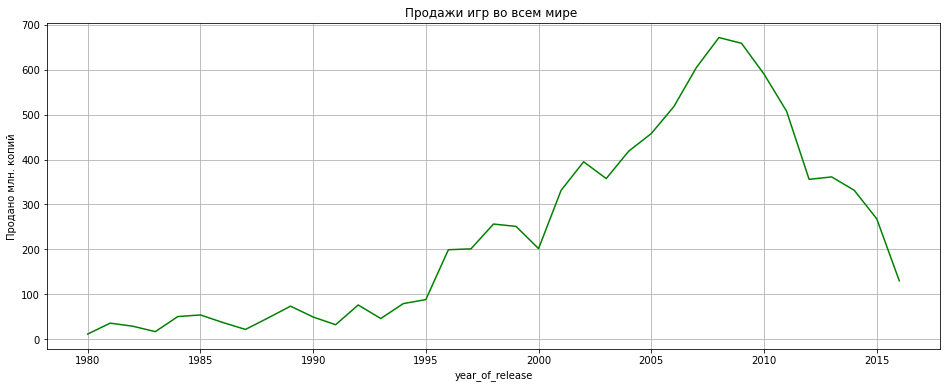

In [ ]:
data.groupby('year_of_release')['all_sales'].agg('sum').plot(
                    title='Продажи игр во всем мире ',
                    ylabel='Продано млн. копий',
                    kind  = 'line',
                    grid = True,
                    color='green',                    
                    figsize=(16, 6)
                    );

Если смотреть продажи всего, то они увы падают, по всем регионам, нельзя выделить какой то отдельный позитывный регион. Но, зато, есть платформы, где происходит рост продаж. Чтобы получить максимальную прибыль, я думаю, нужно сосредоточиться на платформах, которые приносят прибыль.
Мы выяснили, что продажи по платформам со временем меняються, что неудивительно, потому что у каждой платформы игр есть "время жизни". Вначале платформа появляеться , завоевывает популярность, потом постепенно продажи на этой платформе падат, уступая место другим, более молодым и популярным платформам. Важно было выяснить, какие платформы находяться на пике сейчас, или еще будут расти еще в будущем. 

В Америке и европе безоговорочным лидером являеться платформа PS4, на втором месте XOne. В Японии другая ситуация: там лидером являеться платформа 3DS с почти половиной рынка, все остальные занимаю небольшой сегмент рынка.

Также мы выяснили, что разные регионы продаж различаються. В них различные популярны жанры, и надо в каждом регионе продвигать свои продающиеся более всего жанры игр.  Америка и европа похожи: у них любимые жанры это шутеры и Action и  Sports. В Японии же больше любят жанры Role-playing, Action.

В Японии в отличии от других, больше играют подростки и дети, это видно по лидирующим рейтингам продаж, в Северной Америке и европе больше продаються игры со взрослым рейтингом.

Для каждого региона, мы описали типичного покупателя:

- Типичный геймер из региона Северная Америка: играет на платформах  PS4, XOne, X360. Самые популярные жанры игр Shooter, Action, , Sports, Role-Playing, Misc. Играет в игры для взрослой целевой аудитории. 

- Типичный геймер из региона Европа: играет на платформах PS4, XOne Самые популярные жанры игр  Action, Shooter, Sports, Role-Playing,  Играет в игры для взрослой целевой аудитории.

- Типичный геймер из региона Япония: играет на платформах 3DS, PS4, PSV Самые популярные жанры игр Role-Playing, Action,  Fighting, Misc. Играет в игры для всех возрастов, тоесть где мало насилия.

Для того, чтобы увеличивать прибыль в 2017 году , нужно сосредотачиваться нна удовлетворинии нужд типичного покупателя.
